<a href="https://colab.research.google.com/github/nikhilkalia87/diwali_sales_analysis/blob/main/diwali_sales_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# **LOADING THE DATASET**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Diwali Sales Data.csv', encoding = 'unicode_escape')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# **DATA CLEANING**

In [ ]:
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(11239, 13)

In [ ]:
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtype

dtype('int64')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **EXPLORATORY DATA ANALYSIS**

**GENDER WISE ANALYSIS**

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


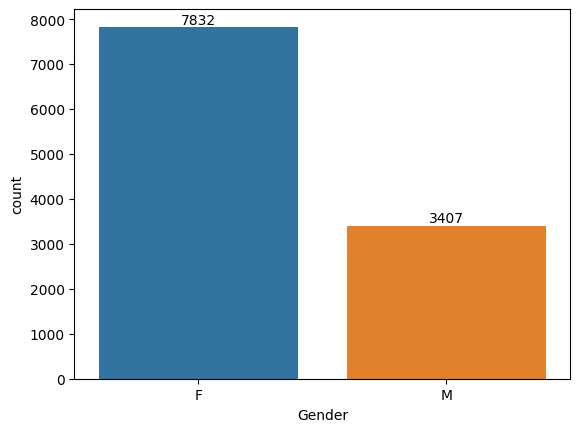

In [ ]:
ax= sns.countplot(x='Gender', data = df, hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


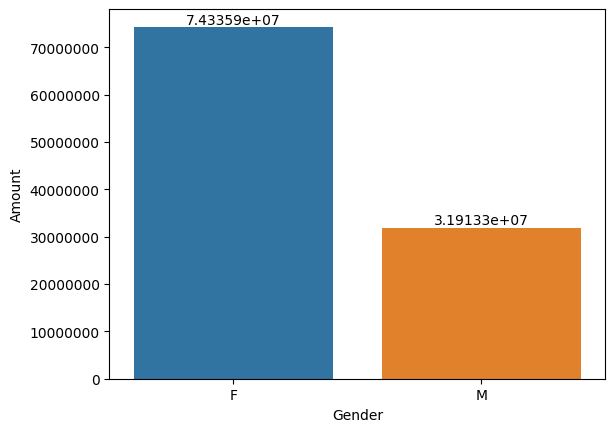

In [ ]:
sales_gender = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(x ='Gender', y = 'Amount', data = sales_gender, hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

FROM ABOVE GRAPHS WE CAN SEE THAT MAJORITY OF THE BUYERS ARE FEMALES AND PURCHASING POWER OF FEMALES IS ALSO GREATER THAN THE MEN

**AGE WISE ANALYSIS**

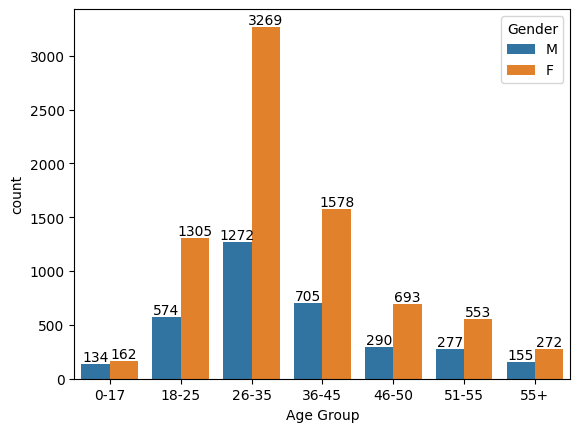

In [ ]:
sorted_df = df.sort_values('Age Group')

ax = sns.countplot(x = 'Age Group',data = sorted_df, hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

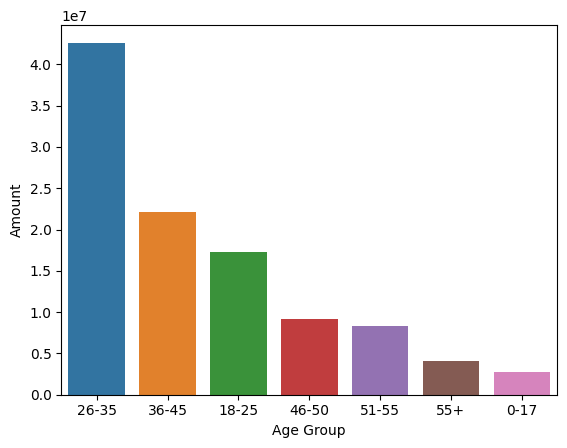

In [ ]:
sales_age = df.groupby('Age Group', as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, hue = 'Age Group')

FROM ABOVE GRAPHS IT IS CLEAR THAT MAJORITY OF THE BUYERS ARE FEMALES THAT ARE FROM 26-35 AGE GROUP

**STATE WISE ANALYSIS**

In [ ]:
df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by ='Orders' ,ascending = False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


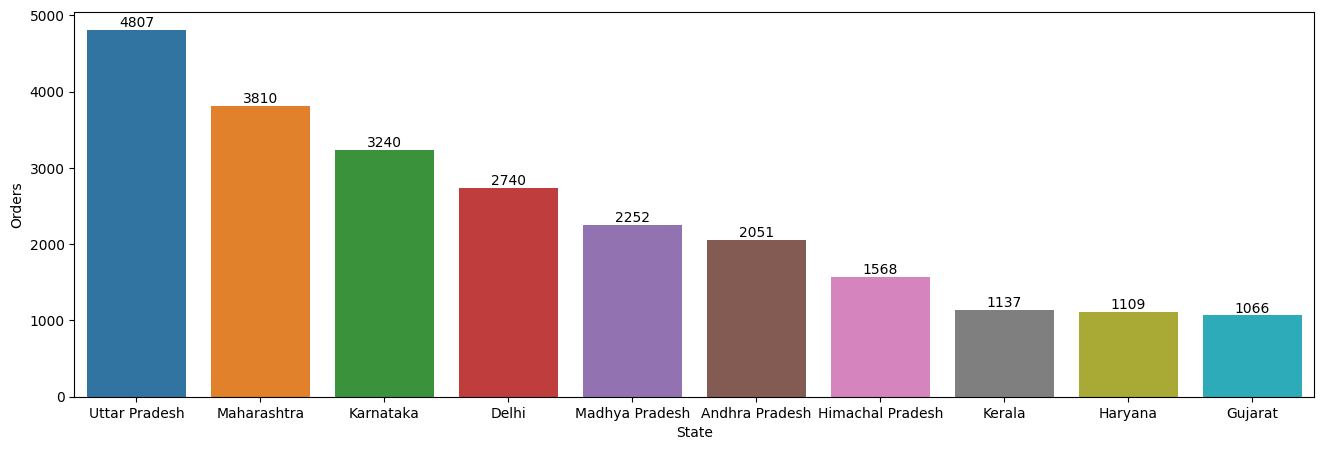

In [ ]:
sales_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)

plt.figure(figsize = (16,5))
ax = sns.barplot(x = 'State', y ='Orders', data = sales_state, hue ='State')


for bars in ax.containers:
  ax.bar_label(bars)


In [ ]:
df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


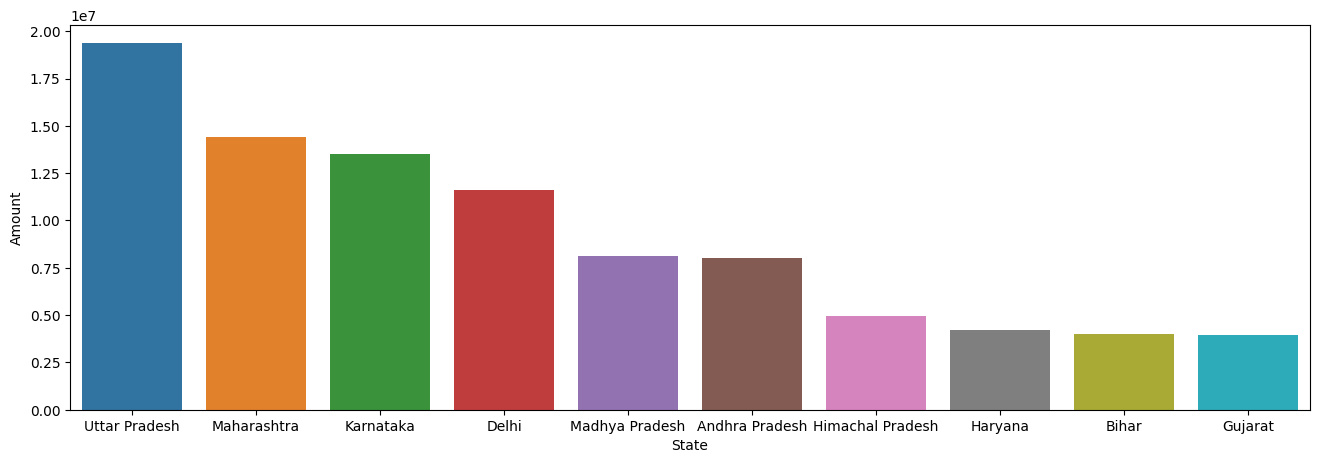

In [ ]:
sales_state_amt = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)

plt.figure(figsize = (16,5))
ax = sns.barplot(x = 'State', y = 'Amount', data = sales_state_amt, hue = 'State')

FROM THE ABOVE GRAPHS, WE CAN OBSERVE THAT THE TOP THREE STATES IN TERMS OF BOTH ORDERS AND AMOUNT SPENT ARE UTTAR PRADESH, MAHARASHTRA, AND KARNATAKA RESPECTIVELY.

MARITAL STATUS

<ipython-input-85-6d46aa09158e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Unmarried', 'Married'])


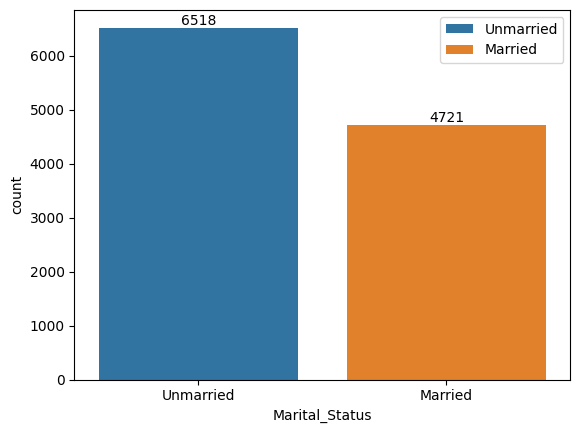

In [ ]:
ax = sns.countplot(data = df, x ='Marital_Status', hue = 'Marital_Status' )
ax.set_xticklabels(['Unmarried', 'Married'])
ax.legend(['Unmarried', 'Married'])

for bars in ax.containers:
  ax.bar_label(bars)

plt.show()

<ipython-input-89-49a404cfa66e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Unmarried','Married'])


[Text(0, 0, 'Unmarried'), Text(1, 0, 'Married')]

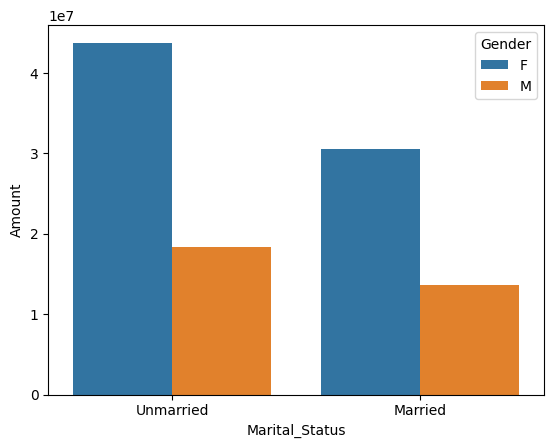

In [ ]:
mr_status = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

ax = sns.barplot(x = 'Marital_Status', y = 'Amount', data = mr_status, hue = 'Gender')
ax.set_xticklabels(['Unmarried','Married'])

FROM THE ABOVE GRAPHS WE CAN OBSERVE UNMARRIED WOMEN HAVE SPENT THE MOST

OCCUPATION WISE ANALYSIS

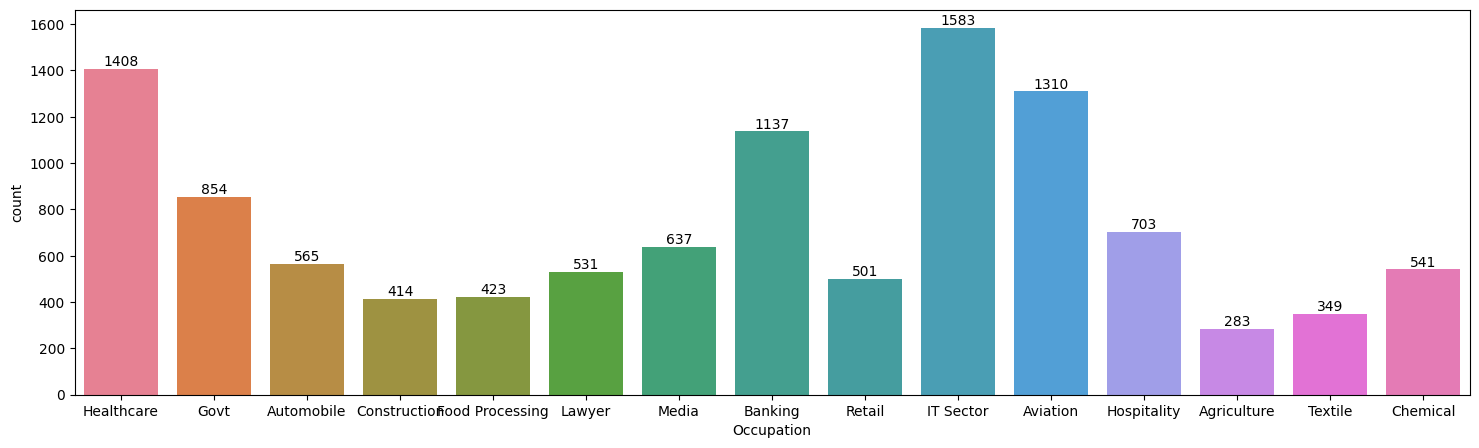

In [ ]:
plt.figure(figsize = (18,5))
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

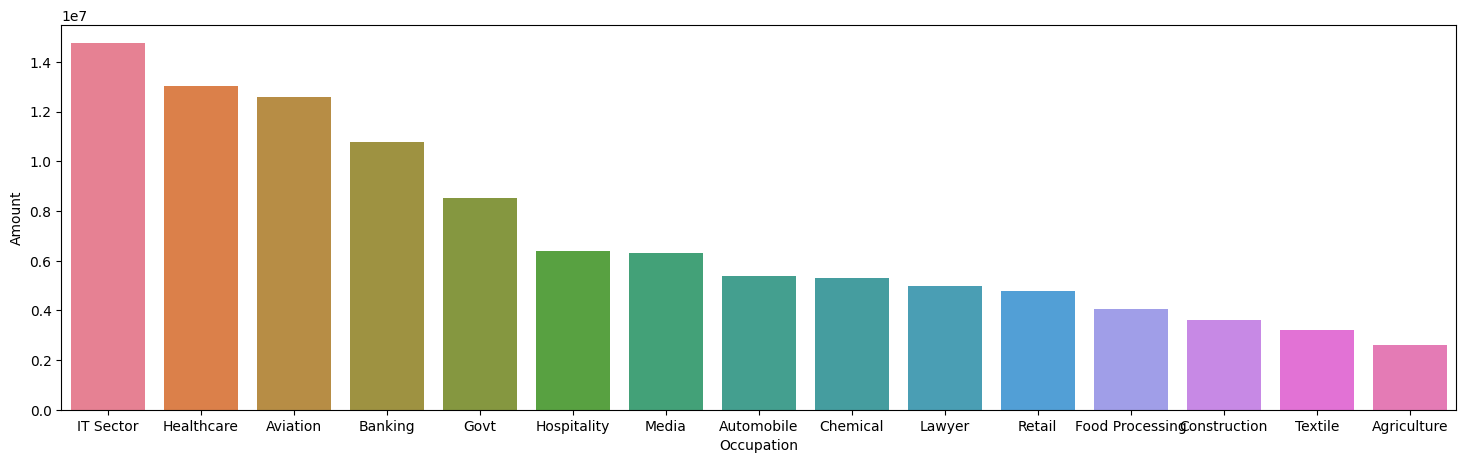

In [ ]:
plt.figure(figsize = (18,5))

occu_status = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
ax = sns.barplot(x = 'Occupation', y = 'Amount', data = occu_status, hue = 'Occupation')


TOP 3 BUYERS ARE FROM IT, HEALTHCARE AND AVIATION SECTOR RESPECTIVELY

ANALYSIS BASED ON PRODUCT CATEGORY

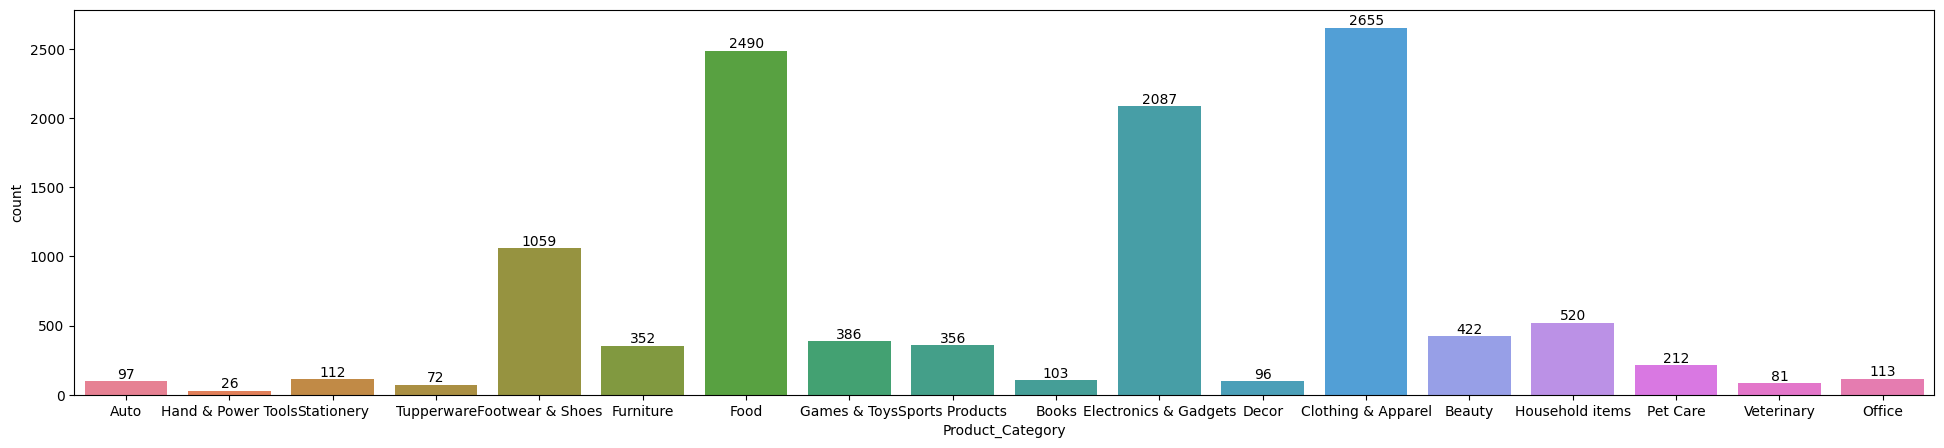

In [ ]:
plt.figure(figsize = (24,5))
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

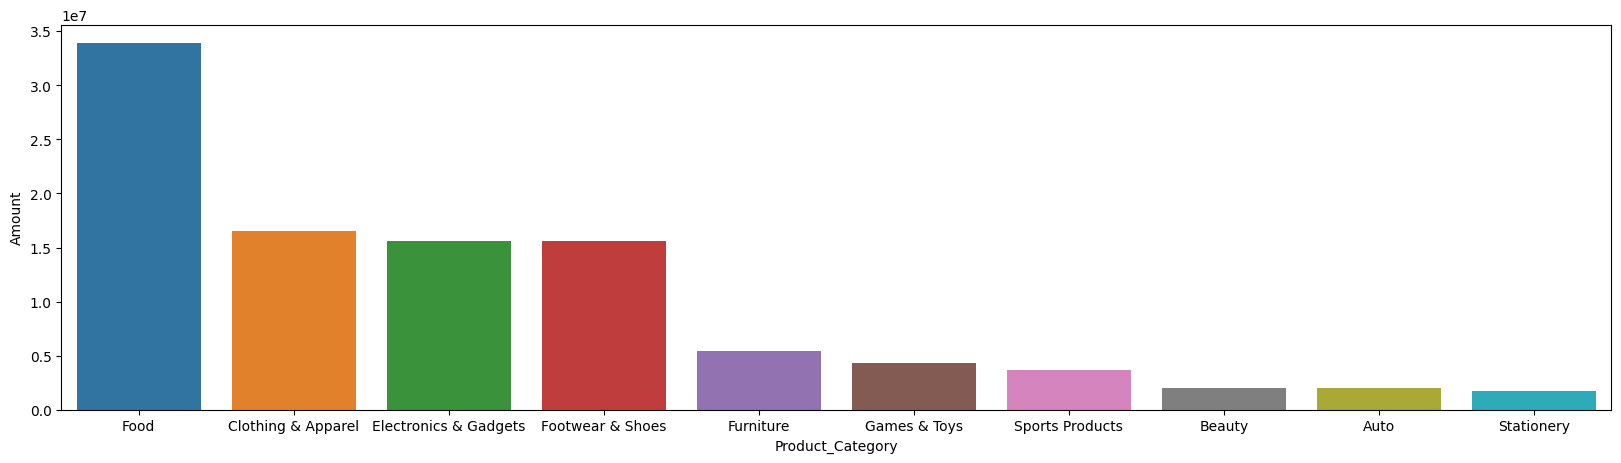

In [ ]:
plt.figure(figsize = (20,5))

prod_cate = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
ax = sns.barplot(x = 'Product_Category', y = 'Amount', data = prod_cate, hue = 'Product_Category')

TOP 3 PRODUCT CATEGORIES IN TERMS OF ORDERS RECEIVED ARE CLOTHING AND APPAREL, FOOD AND ELECTRONICS AND GADGETS
AND TOP 3 PRODUCT CATEGORIES IN TERMS OF AMOUNT SPENT ARE FOOD, CLOTHING AND APPAREL AND ELECTRONICS AND GADGETS

# CONCLUSION

UNMARRIED WOMEN FROM AGE GROUP 26-35 FROM UP, MAHARASHTRA AND KARNATAKA WORKING IN IT, HEALTHCARE AND AVIATION ARE MORE LIKELY TO BUY THE PRODUCTS FROM FOOD, CLOTHING AND ELECTRONICS CATEGORY.